In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

ModuleNotFoundError: No module named 'plotly'

### <b>III <span style='color:#526D82'>|</span> Input the data</b> 

In [2]:
data = pd.read_csv('/kaggle/input/internet-users/Final.csv')

In [3]:
data.head(10)

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,4,Afghanistan,AFG,1984,0.0,0.0,0,0.0
5,5,Afghanistan,AFG,1985,0.0,0.0,0,0.0
6,6,Afghanistan,AFG,1986,0.0,0.0,0,0.0
7,7,Afghanistan,AFG,1987,0.0,0.0,0,0.0
8,8,Afghanistan,AFG,1988,0.0,0.0,0,0.0
9,9,Afghanistan,AFG,1989,0.0,0.0,0,0.0


In [4]:
# Loop through each column and count the number of distinct values
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0: 8867 distinct values
Entity: 229 distinct values
Code: 216 distinct values
Year: 41 distinct values
Cellular Subscription: 6344 distinct values
Internet Users(%): 4702 distinct values
No. of Internet Users: 5058 distinct values
Broadband Subscription: 3858 distinct values


In [5]:
# Handle duplicates
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 8)


In [6]:
data = data.drop('Unnamed: 0', axis=1)

### <b>II <span style='color:#16C2D5'>|</span> Completeness </b> 

In [7]:
#check missing ratio
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio


### <b>III <span style='color:#526D82'>|</span> Consistency </b> 

In [8]:
# Print the unique values in the "Code" column
unique_value = data['Code'].unique()
print(unique_value)

['AFG' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT'
 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL'
 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR' 'CAN' 'CPV'
 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'CRI' 'CIV' 'HRV' 'CUB'
 'CUW' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'Region' 'ECU' 'EGY'
 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB'
 'GMB' 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GIN' 'GNB'
 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR'
 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'OWID_KOS' 'KWT' 'KGZ' 'LAO'
 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MDG' 'MWI' 'MYS'
 'MDV' 'MLI' 'MLT' 'MHL' 'MRT' 'MUS' 'MEX' 'FSM' 'MDA' 'MCO' 'MNG' 'MNE'
 'MAR' 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER' 'NGA'
 'PRK' 'MKD' 'MNP' 'NOR' 'OMN' 'PAK' 'PLW' 'PSE' 'PAN' 'PNG' 'PRY' 'PER'
 'PHL' 'POL' 'PRT' 'PRI' 'QAT' 'ROU' 'RUS' 'RWA' 'KNA' 

In [9]:
#Create a new dataframe
df = data.copy()

#Separate World and Region from the data set
world_df = df[df['Code'].str.contains('OWID_WRL')].copy()
region_df = df[df['Code'].str.contains('Region')].copy()

# Change 'OWID_KOS' to 'KOS' in the 'Code' column
df['Code'] = df['Code'].replace('OWID_KOS', 'KOS')

# Drop rows with 'OWID_WRL' and 'Region' values in the 'Code' column
df = df[~df['Code'].isin(['OWID_WRL', 'Region'])].copy()

In [10]:
# Print the unique values in the "Code" column
unique_value = df['Code'].unique()
print(unique_value)

['AFG' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT'
 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL'
 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR' 'CAN' 'CPV'
 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'CRI' 'CIV' 'HRV' 'CUB'
 'CUW' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ'
 'ERI' 'EST' 'SWZ' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB' 'GMB' 'GEO'
 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI'
 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM'
 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'KOS' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO'
 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT'
 'MHL' 'MRT' 'MUS' 'MEX' 'FSM' 'MDA' 'MCO' 'MNG' 'MNE' 'MAR' 'MOZ' 'MMR'
 'NAM' 'NRU' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER' 'NGA' 'PRK' 'MKD' 'MNP'
 'NOR' 'OMN' 'PAK' 'PLW' 'PSE' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL' 'PRT'
 'PRI' 'QAT' 'ROU' 'RUS' 'RWA' 'KNA' 'LCA' 'VCT' 'W

In [11]:
# Print the unique values in the "Entity" column
unique_value = region_df['Entity'].unique()
print(unique_value)

['East Asia and Pacific' 'Europe and Central Asia' 'European Union'
 'High income' 'Latin America and Caribbean' 'Low and middle income'
 'Low income' 'Lower middle income' 'Middle East and North Africa'
 'Middle income' 'North America' 'South Asia' 'Sub-Saharan Africa'
 'Upper middle income']


In [12]:
# Specify the values we want to separate from the 'Entity' column
desired_values = ['High income', 'Low and middle income', 'Low income', 'Lower middle income', 'Middle income', 'Upper middle income']
# Create a new dataframe for the desired values
income_df = region_df[region_df['Entity'].isin(desired_values)].copy()
# Drop the rows containing the desired values from the 'Entity' column
region_df = region_df[~region_df['Entity'].isin(desired_values)].copy()

In [13]:
# Print the unique values in the "Entity" column
unique_value = income_df['Entity'].unique()
print(unique_value)

['High income' 'Low and middle income' 'Low income' 'Lower middle income'
 'Middle income' 'Upper middle income']


In [14]:
# Print the unique values in the "Entity" column
unique_value = region_df['Entity'].unique()
print(unique_value)

['East Asia and Pacific' 'Europe and Central Asia' 'European Union'
 'Latin America and Caribbean' 'Middle East and North Africa'
 'North America' 'South Asia' 'Sub-Saharan Africa']


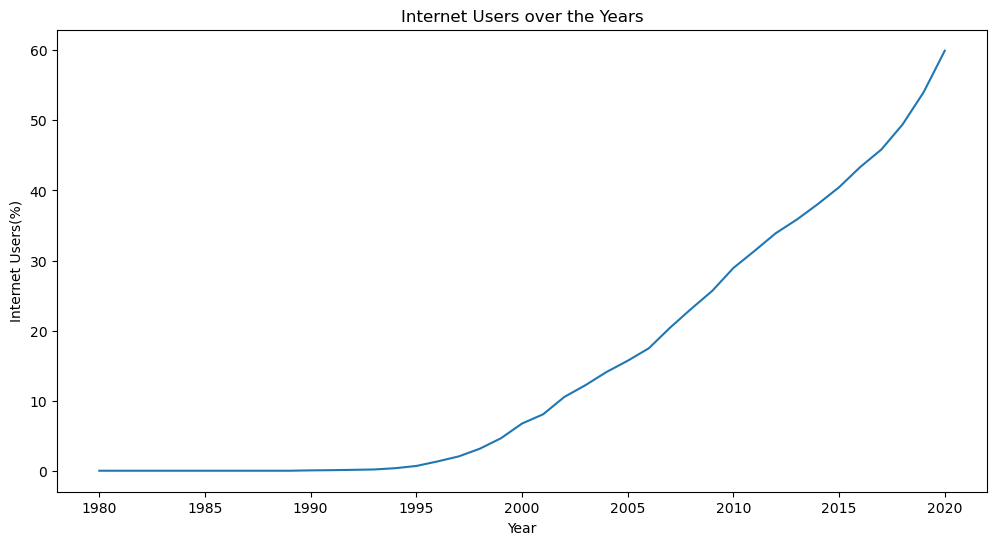

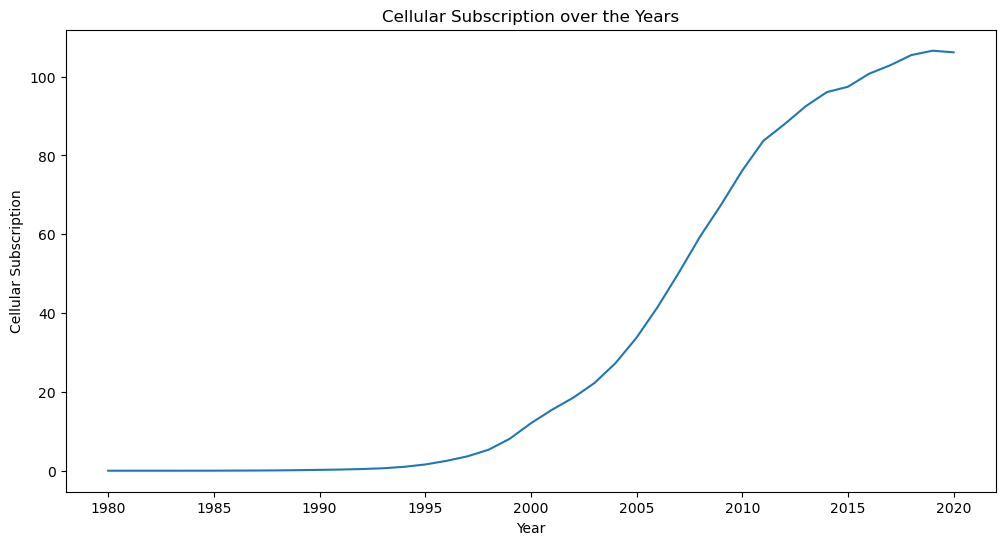

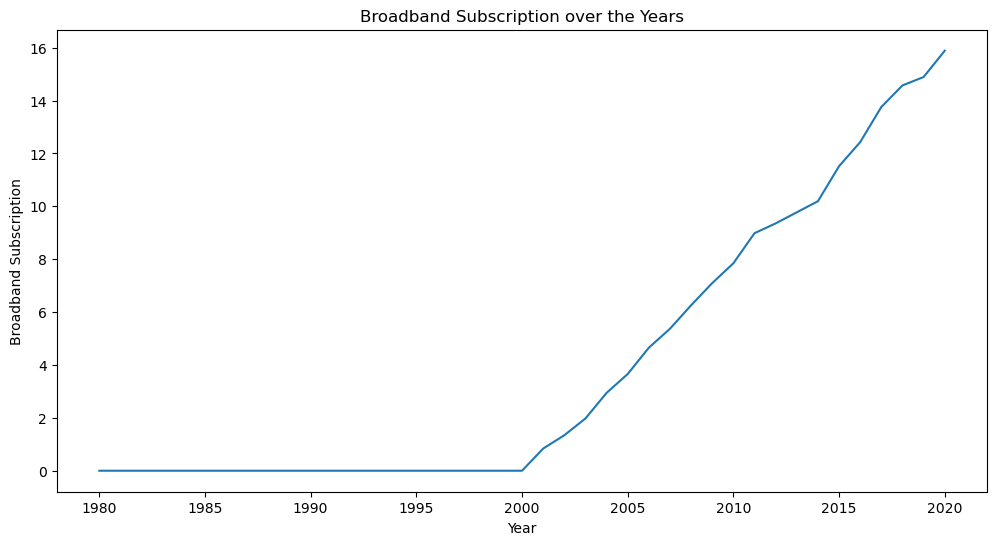

In [15]:
# Line plot of Internet Users over the years for the specific region
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Internet Users(%)', data=world_df)
plt.title('Internet Users over the Years')
plt.show()

# Line plot of Cellular Subscription over the years for the specific region
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Cellular Subscription', data=world_df)
plt.title('Cellular Subscription over the Years')
plt.show()

# Line plot of Broadband Subscription over the years for the specific region
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Broadband Subscription', data=world_df)
plt.title('Broadband Subscription over the Years')
plt.show()

In [18]:
df_2020 = df[df['Year'] == 2020]

In [19]:
fig = px.choropleth(df_2020, 
                    locations='Code', 
                    color='No. of Internet Users', 
                    hover_name='Entity', 
                    color_continuous_scale='RdBu',
                    range_color=(0, 200000000),  # Set the color range from 0 to 200 million
                    )

fig.update_layout(
    title_text='Number of Internet Users in 2020',
    coloraxis_colorbar=dict(
        title='No. of Internet Users',
        dtick=20000000,  # Adjust the colorbar tick interval as per your preference
        tickformat='.0s',  # Format the tick labels in a readable way
    )
)

fig.show()

In [23]:
# Create a new column for the decade
df['Decade'] = (df['Year'] // 10) * 10

# Separate the dataframe into different periods
df_80s = df[df['Decade'] == 1980]
df_90s = df[df['Decade'] == 1990]
df_2000s = df[df['Decade'] == 2000]
df_2010s = df[df['Decade'] == 2010]
df_2020s = df[df['Decade'] == 2020]

In [24]:
def cluster_data(df_decade, decade_name):
    # Handle missing values
    df_decade.fillna(df_decade.mean(), inplace=True)

    # Define the features for clustering
    features = ['Cellular Subscription', 'Internet Users(%)', 'No. of Internet Users', 'Broadband Subscription']

    # Standardize the features
    scaler = StandardScaler()
    df_decade_scaled = df_decade.copy()
    df_decade_scaled[features] = scaler.fit_transform(df_decade[features])

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df_decade_scaled[features])
    df_decade_pca = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=3)
    clusters = kmeans.fit_predict(df_decade_pca)
    df_decade_pca['Cluster'] = clusters
    df_decade_pca['Entity'] = df_decade['Entity'].values

    # Visualize the clusters using Plotly
    fig = px.scatter(df_decade_pca, x='Principal Component 1', y='Principal Component 2', color='Cluster', 
                     hover_data=['Entity'], title=f'Clusters for {decade_name}')
    fig.show()

### <b>II <span style='color:#526D82'>|</span> apply the function to each decade</b> 

In [25]:
# Apply function to each decade
cluster_data(df_80s, '1980s')
cluster_data(df_90s, '1990s')
cluster_data(df_2000s, '2000s')
cluster_data(df_2010s, '2010s')
cluster_data(df_2020s, '2020s')

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset

In [28]:
#Create a new dataframe
df = data.copy()

#Separate World and Region from the data set
world_df = df[df['Code'].str.contains('OWID_WRL')].copy()

In [29]:
# Remove rows with values from 1980 to 1989 in the "Year" column
world_df = world_df[~world_df['Year'].between(1980, 1989)]

# Reset the index of the DataFrame
world_df.reset_index(drop=True, inplace=True)

In [30]:
# Convert the 'Year' column to datetime format
world_df['Year'] = pd.to_datetime(world_df['Year'], format='%Y')
print(world_df.dtypes)

Entity                            object
Code                              object
Year                      datetime64[ns]
Cellular Subscription            float64
Internet Users(%)                float64
No. of Internet Users              int64
Broadband Subscription           float64
dtype: object


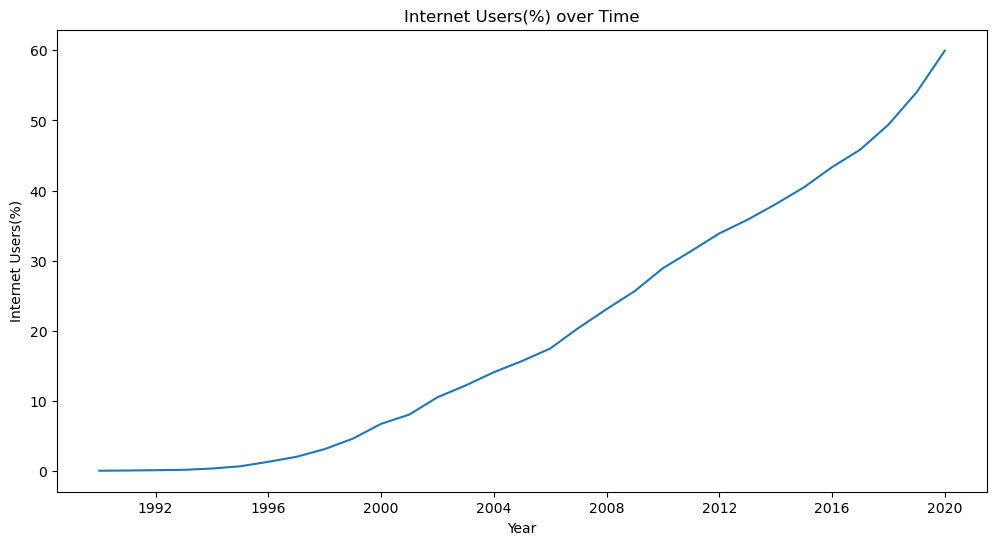

In [31]:
# Plot the time series data
plt.figure(figsize=(12, 6))
sns.lineplot(data=world_df, x='Year', y='Internet Users(%)')
plt.title('Internet Users(%) over Time')
plt.xlabel('Year')
plt.ylabel('Internet Users(%)')
plt.show()

In [32]:
# Set the Year as the index
world_df.set_index('Year', inplace=True)

# Convert the index to a PeriodIndex with yearly frequency
world_df.index = pd.PeriodIndex(world_df.index, freq='A-DEC')

# Convert the index to datetime format for plotting
world_df.index = world_df.index.to_timestamp()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 3. Methodology</span></b> </div>

The dataset represents the global internet user penetration rate, expressed as a percentage. The data includes a single series with yearly observations.

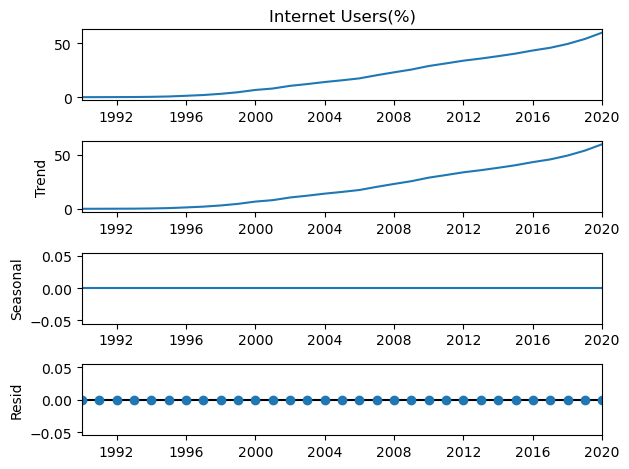

In [33]:
# Decompose the time series
decomposition = seasonal_decompose(world_df['Internet Users(%)'], period=1)

# Plot the trend, seasonal, and residual components
decomposition.plot()
plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 4. Model</span></b> </div>

We have used the **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">SARIMAX</mark>** model, which is a generalization of **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">ARIMA</mark>**. **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">SARIMAX</mark>** models are denoted SARIMAX(p,d,q)(P,D,Q)m, where:

* p, d, q are the non-seasonal parameters,

* P, D, Q are the seasonal parameters, and

* m is the number of periods per season.

In our case, since we have no seasonality, the seasonal parameters were not utilized.

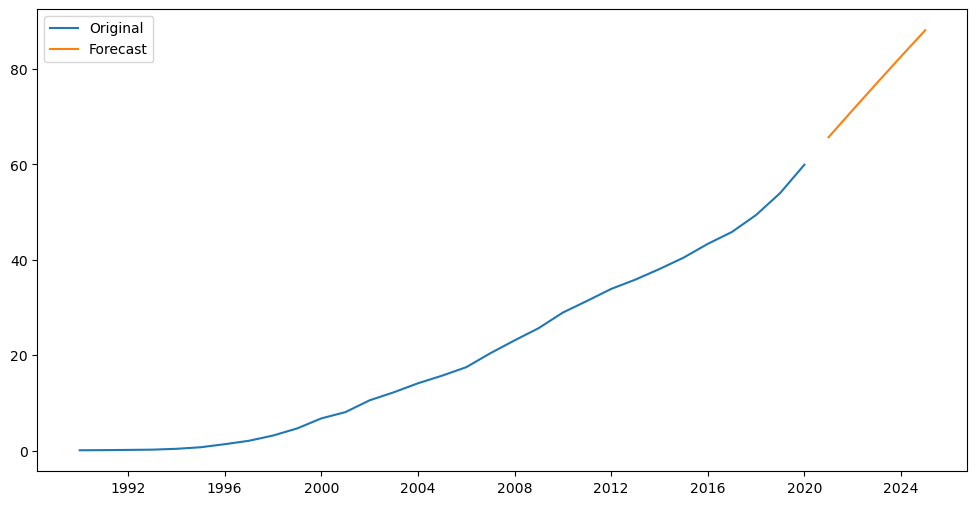

In [34]:
# Fit a SARIMAX model
model = SARIMAX(world_df['Internet Users(%)'], order=(1, 1, 1))
results = model.fit(disp=-1)

# Generate forecast for the next 5 years
future_years = [world_df.index[-1] + DateOffset(years=x) for x in range(1, 6)]
future_years_df = pd.DataFrame(index=future_years, columns=world_df.columns)
future_df = pd.concat([world_df, future_years_df])

# Predict for the next 5 years
future_df['forecast'] = results.predict(start = len(world_df), end = len(world_df) + 5, dynamic= True)

# Plot the original data, the fitted values, and the forecast
plt.figure(figsize=(12, 6))
plt.plot(future_df['Internet Users(%)'], label='Original')
plt.plot(future_df['forecast'], label='Forecast')
plt.legend(loc='best')
plt.show()